# Sentiment Analysis on Yelp Reviews

**Overview:**
This project focuses on sentiment analysis of Yelp reviews using Natural Language Processing (NLP) techniques. Yelp is a platform where users can leave reviews for various businesses, providing valuable data for analysis. By leveraging this data, we aim to understand the relationship between the textual content of reviews and the ratings (stars) given by users.

**Goal:**
The primary goal of this project is to build a model that can accurately predict the sentiment of a Yelp review based on its text content. This involves classifying reviews into positive or negative sentiment categories using machine learning algorithms.

**Key Objectives:**

**Data Preprocessing:**
- Import and clean the Yelp review dataset to make it suitable for analysis. This includes handling missing values, encoding categorical variables, and creating new features such as text length.

**Exploratory Data Analysis (EDA):**
- Perform EDA to understand the distribution of reviews, the relationship between text length and star ratings, and other key insights.

**Feature Extraction:** 
- Use techniques like CountVectorizer and TF-IDF (Term Frequency-Inverse Document Frequency) to convert text data into numerical features suitable for machine learning models.

**Model Training and Evaluation:**
- Train a Naive Bayes classifier to predict review sentiment and evaluate its performance using metrics such as accuracy, precision, recall, and F1-score.

**Model Comparison:** 
- Compare the performance of models with different feature extraction techniques (CountVectorizer vs. TF-IDF) to identify the most effective approach.

Source: [Link to Data](https://github.com/Adamshepherd36/My_data/blob/main/yelp.csv)

In [5]:
# Importing the libraries I will use for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading in the data
yelp = pd.read_csv('/Users/adam/Downloads/yelp.csv')
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
# Looking at the data type for each column
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
# Look at some descriptive statistical information
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [11]:
#Create a new column called "text length" which is the number of words in the text column
yelp['text length'] = yelp['text'].apply(len)

**Exploratory Data Analysis (EDA)**

In [16]:
sns.set_style('white')

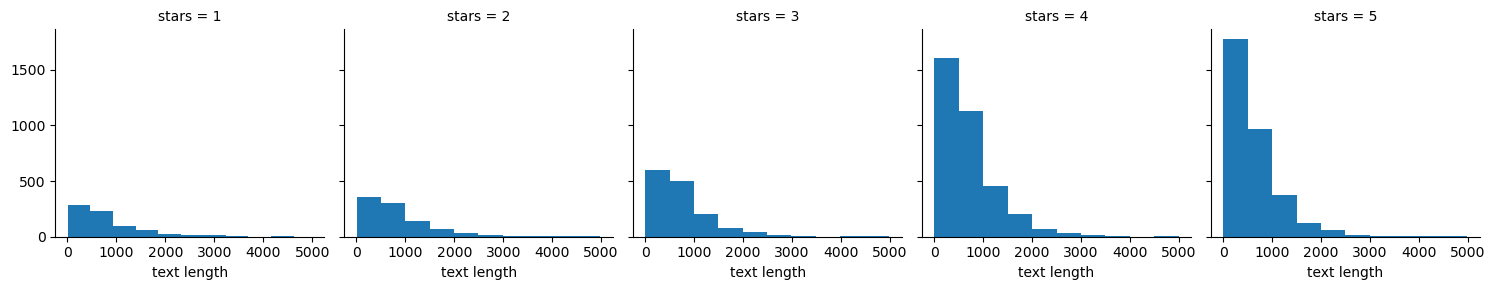

In [16]:
# Create a grid of 5 histograms of text length based off of the star ratings
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist, 'text length')

<Axes: xlabel='stars', ylabel='text length'>

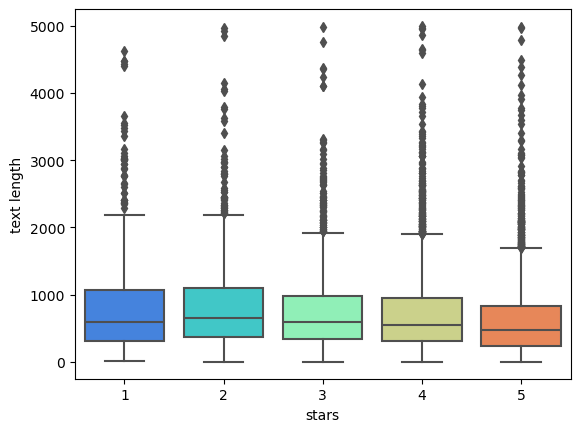

In [18]:
# Create a boxplot of text length for each star category
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

<Axes: xlabel='stars', ylabel='count'>

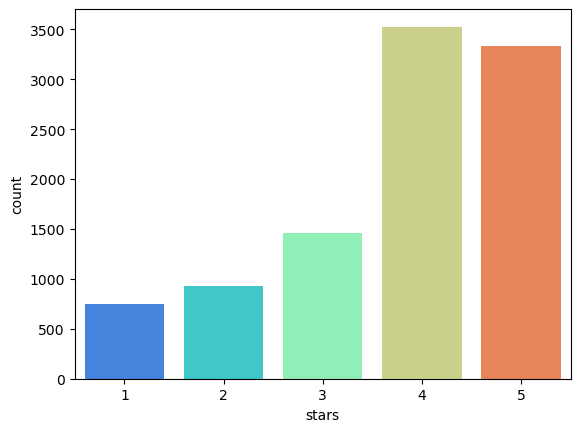

In [20]:
# Create a countplot of the number of occurrences for eachtype of star rating
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [22]:
# Getting mean values of numeric columns and correlation along with a heatmap
numeric_cols = yelp.select_dtypes(include=['int64']).columns

stars = yelp[numeric_cols].groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [24]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

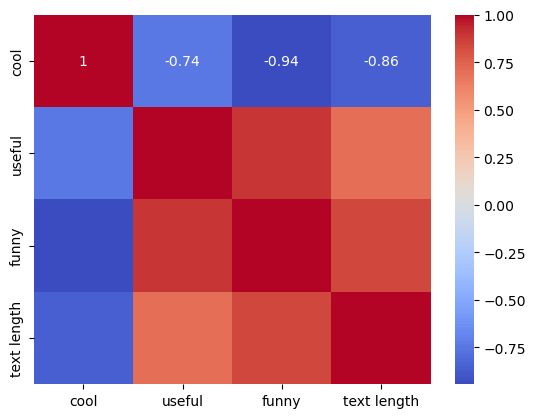

In [26]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

### NLP Classification Task

In [28]:
# Created a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [30]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


**Train test split**

In [33]:
#Use train_test_split to split your data into a training set and a testing set
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = yelp_class['text']
y = yelp_class['stars']

cv = CountVectorizer()
X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [222]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [224]:
X = cv.fit_transform(X)

**Training model**

In [35]:
# Fitting it to the model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train,y_train)

MultinomialNB()

**Predictions and Evaluations**

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

predictions = nb.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Using Text Processing**

In [40]:
#Let's see what happens if we try to include TF-IDF to this process using a pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB())])

**Train test split**

In [42]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Training model**

In [48]:
# Fitting it to the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

**Predictions and Evaluations**

In [57]:
predictions2 = pipe.predict(X_test)

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.simplefilter("ignore", category=UndefinedMetricWarning)

print(confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



# Conclusion
In this project, we aimed to predict the sentiment of Yelp reviews by applying NLP techniques and machine learning algorithms. Here is a summary of our key findings and results:

**Data Preprocessing and EDA:**
We imported the Yelp dataset containing 10,000 reviews and explored its structure and statistical properties.
A new feature, 'text length,' was created to represent the number of characters in each review.
Exploratory analysis revealed that reviews with different star ratings exhibit distinct text length distributions.

**Feature Extraction and Model Training:

We used CountVectorizer and TF-IDF for text feature extraction.
Two models were trained: one using CountVectorizer and another using TF-IDF for feature extraction.
The Naive Bayes classifier was employed to predict the sentiment of reviews.
Model Evaluation:

The CountVectorizer-based model achieved an accuracy of 93%, with a precision of 0.91, recall of 0.84, and F1-score of 0.87 for class 1 (positive sentiment).
The TF-IDF-based model, however, performed worse, indicating that TF-IDF did not enhance the model's predictive capability in this case.
Key Results:

The confusion matrix for the CountVectorizer model showed that it correctly predicted 976 out of 1,226 positive reviews and 159 out of 228 negative reviews.
For the TF-IDF model, the classification report indicated a significant drop in performance, with an accuracy of 81%, and the model failed to predict negative reviews accurately (precision, recall, and F1-score of 0 for class 1).
Based on these results, it appears that using TF-IDF for feature extraction did not improve model performance. Thus, for this dataset, the CountVectorizer approach is more effective. Further analysis could explore additional feature engineering techniques and different machine learning algorithms to enhance prediction accuracy.